# NER Implementation

In [1]:
# Sample text

texts = [

    # Tech News 

    """

    TechCorp, a leading tech company based in New York, announced on Monday that CEO Jane Doe plans to introduce a new AI-powered smartphone.

    The device, named 'Nexus X,' will debut in Paris next month. Meanwhile, critics like Dr. Mark Smith argue that the launch could impact environmental policies.

    The company also partnered with HealthOrg, a nonprofit, to promote digital wellness. Apple declined to comment on the news.

    The event will coincide with the Global Tech Summit 2024.

    """,

 

    # Sports News

    """

    Lionel Messi, the Argentine footballer, signed a $20 million contract with Miami FC on July 15, 2023.

    The deal was announced during a press conference at Hard Rock Stadium in Florida.

    Fans from across South America flooded social media to celebrate the move.

    """,

 

    # Politics

    """

    President John Harper met with German Chancellor Angela Weber in Berlin last Friday to discuss NATO policies.

    The United Nations will host a climate summit in Geneva, Switzerland, in December 2025.

    Critics warn that the new tax law (HB 1420) might face delays in Congress.

    """,

 

    # Science/Literature

    """

    Marie Curie, born in Warsaw in 1867, discovered radium and won the Nobel Prize in Chemistry in 1911.

    In "The Great Gatsby," Jay Gatsby hosts lavish parties in West Egg, New York, reflecting the excesses of the Jazz Age.

    A recent study in Nature Journal links sleep deprivation to decreased cognitive performance.

    """

]

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    return text

# Apply to all texts
preprocessed_texts = [preprocess(text) for text in texts]

for text in preprocessed_texts:
    print(text)




    techcorp a leading tech company based in new york announced on monday that ceo jane doe plans to introduce a new aipowered smartphone

    the device named nexus x will debut in paris next month meanwhile critics like dr mark smith argue that the launch could impact environmental policies

    the company also partnered with healthorg a nonprofit to promote digital wellness apple declined to comment on the news

    the event will coincide with the global tech summit 2024

    


    lionel messi the argentine footballer signed a 20 million contract with miami fc on july 15 2023

    the deal was announced during a press conference at hard rock stadium in florida

    fans from across south america flooded social media to celebrate the move

    


    president john harper met with german chancellor angela weber in berlin last friday to discuss nato policies

    the united nations will host a climate summit in geneva switzerland in december 2025

    critics warn that the new t

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import spacy

# Load pre-trained model
nlp = spacy.load("en_core_web_sm")

data = []

# Process each text
for i, text in enumerate(preprocessed_texts):
    doc = nlp(text)
    print(f"\nText {i+1} Entities:")
    for ent in doc.ents:
        if ent.label_ in ["PERSON", "ORG", "DATE", "GPE"]:
            print(f"{ent.text} - {ent.label_}")
            data.append({
                "Text": text,
                "Entity": ent.text,
                "Label": ent.label_
            })
    spacy.displacy.render(doc, style="ent", jupyter=True)

    # Save visualization as an HTML file
    html = spacy.displacy.render(doc, style="ent", page=True, jupyter=False)
    with open("ner_visualization.html", "a", encoding="utf-8") as f:
        f.write(html)



Text 1 Entities:
new york - GPE
monday - DATE
paris - GPE
next month - DATE
dr mark smith - PERSON
2024 - DATE



Text 2 Entities:
miami - GPE
july 15 2023 - DATE
florida - GPE



Text 3 Entities:
john harper - PERSON
angela - PERSON
berlin - GPE
last friday - DATE
nato - ORG
the united nations - ORG
geneva - GPE
switzerland - GPE
december 2025 - DATE
1420 - DATE
congress - ORG



Text 4 Entities:
warsaw - GPE
1867 - DATE
1911 - DATE
west egg - GPE
new york - GPE


In [4]:
import pandas as pd
pd.DataFrame(data).to_csv("ner_data.csv", index=False)

# POS-Tagging Extraction

In [31]:
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
pos_tags = []
for i, text in enumerate(preprocessed_texts):
    tokens = word_tokenize(text)
    doc = nlp(text)
    pos_tag_current = pos_tag(tokens)
    pos_tags+=pos_tag_current
    spacy.displacy.render(doc, style="dep", jupyter=True)
    print(f"\nText {i+1} POS Tags:")
    print(pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



Text 1 POS Tags:
[('techcorp', 'VB'), ('a', 'DT'), ('leading', 'VBG'), ('tech', 'NN'), ('company', 'NN'), ('based', 'VBN'), ('in', 'IN'), ('new', 'JJ'), ('york', 'NN'), ('announced', 'VBD'), ('on', 'IN'), ('monday', 'NN'), ('that', 'IN'), ('ceo', 'NN'), ('jane', 'NN'), ('doe', 'NN'), ('plans', 'VBZ'), ('to', 'TO'), ('introduce', 'VB'), ('a', 'DT'), ('new', 'JJ'), ('aipowered', 'JJ'), ('smartphone', 'NN'), ('the', 'DT'), ('device', 'NN'), ('named', 'VBN'), ('nexus', 'JJ'), ('x', 'NN'), ('will', 'MD'), ('debut', 'VB'), ('in', 'IN'), ('paris', 'JJ'), ('next', 'JJ'), ('month', 'NN'), ('meanwhile', 'RB'), ('critics', 'NNS'), ('like', 'IN'), ('dr', 'NN'), ('mark', 'NN'), ('smith', 'NN'), ('argue', 'NN'), ('that', 'IN'), ('the', 'DT'), ('launch', 'NN'), ('could', 'MD'), ('impact', 'VB'), ('environmental', 'JJ'), ('policies', 'NNS'), ('the', 'DT'), ('company', 'NN'), ('also', 'RB'), ('partnered', 'VBD'), ('with', 'IN'), ('healthorg', 'NN'), ('a', 'DT'), ('nonprofit', 'JJ'), ('to', 'TO'), ('pr


Text 2 POS Tags:
[('techcorp', 'VB'), ('a', 'DT'), ('leading', 'VBG'), ('tech', 'NN'), ('company', 'NN'), ('based', 'VBN'), ('in', 'IN'), ('new', 'JJ'), ('york', 'NN'), ('announced', 'VBD'), ('on', 'IN'), ('monday', 'NN'), ('that', 'IN'), ('ceo', 'NN'), ('jane', 'NN'), ('doe', 'NN'), ('plans', 'VBZ'), ('to', 'TO'), ('introduce', 'VB'), ('a', 'DT'), ('new', 'JJ'), ('aipowered', 'JJ'), ('smartphone', 'NN'), ('the', 'DT'), ('device', 'NN'), ('named', 'VBN'), ('nexus', 'JJ'), ('x', 'NN'), ('will', 'MD'), ('debut', 'VB'), ('in', 'IN'), ('paris', 'JJ'), ('next', 'JJ'), ('month', 'NN'), ('meanwhile', 'RB'), ('critics', 'NNS'), ('like', 'IN'), ('dr', 'NN'), ('mark', 'NN'), ('smith', 'NN'), ('argue', 'NN'), ('that', 'IN'), ('the', 'DT'), ('launch', 'NN'), ('could', 'MD'), ('impact', 'VB'), ('environmental', 'JJ'), ('policies', 'NNS'), ('the', 'DT'), ('company', 'NN'), ('also', 'RB'), ('partnered', 'VBD'), ('with', 'IN'), ('healthorg', 'NN'), ('a', 'DT'), ('nonprofit', 'JJ'), ('to', 'TO'), ('pr


Text 3 POS Tags:
[('techcorp', 'VB'), ('a', 'DT'), ('leading', 'VBG'), ('tech', 'NN'), ('company', 'NN'), ('based', 'VBN'), ('in', 'IN'), ('new', 'JJ'), ('york', 'NN'), ('announced', 'VBD'), ('on', 'IN'), ('monday', 'NN'), ('that', 'IN'), ('ceo', 'NN'), ('jane', 'NN'), ('doe', 'NN'), ('plans', 'VBZ'), ('to', 'TO'), ('introduce', 'VB'), ('a', 'DT'), ('new', 'JJ'), ('aipowered', 'JJ'), ('smartphone', 'NN'), ('the', 'DT'), ('device', 'NN'), ('named', 'VBN'), ('nexus', 'JJ'), ('x', 'NN'), ('will', 'MD'), ('debut', 'VB'), ('in', 'IN'), ('paris', 'JJ'), ('next', 'JJ'), ('month', 'NN'), ('meanwhile', 'RB'), ('critics', 'NNS'), ('like', 'IN'), ('dr', 'NN'), ('mark', 'NN'), ('smith', 'NN'), ('argue', 'NN'), ('that', 'IN'), ('the', 'DT'), ('launch', 'NN'), ('could', 'MD'), ('impact', 'VB'), ('environmental', 'JJ'), ('policies', 'NNS'), ('the', 'DT'), ('company', 'NN'), ('also', 'RB'), ('partnered', 'VBD'), ('with', 'IN'), ('healthorg', 'NN'), ('a', 'DT'), ('nonprofit', 'JJ'), ('to', 'TO'), ('pr


Text 4 POS Tags:
[('techcorp', 'VB'), ('a', 'DT'), ('leading', 'VBG'), ('tech', 'NN'), ('company', 'NN'), ('based', 'VBN'), ('in', 'IN'), ('new', 'JJ'), ('york', 'NN'), ('announced', 'VBD'), ('on', 'IN'), ('monday', 'NN'), ('that', 'IN'), ('ceo', 'NN'), ('jane', 'NN'), ('doe', 'NN'), ('plans', 'VBZ'), ('to', 'TO'), ('introduce', 'VB'), ('a', 'DT'), ('new', 'JJ'), ('aipowered', 'JJ'), ('smartphone', 'NN'), ('the', 'DT'), ('device', 'NN'), ('named', 'VBN'), ('nexus', 'JJ'), ('x', 'NN'), ('will', 'MD'), ('debut', 'VB'), ('in', 'IN'), ('paris', 'JJ'), ('next', 'JJ'), ('month', 'NN'), ('meanwhile', 'RB'), ('critics', 'NNS'), ('like', 'IN'), ('dr', 'NN'), ('mark', 'NN'), ('smith', 'NN'), ('argue', 'NN'), ('that', 'IN'), ('the', 'DT'), ('launch', 'NN'), ('could', 'MD'), ('impact', 'VB'), ('environmental', 'JJ'), ('policies', 'NNS'), ('the', 'DT'), ('company', 'NN'), ('also', 'RB'), ('partnered', 'VBD'), ('with', 'IN'), ('healthorg', 'NN'), ('a', 'DT'), ('nonprofit', 'JJ'), ('to', 'TO'), ('pr

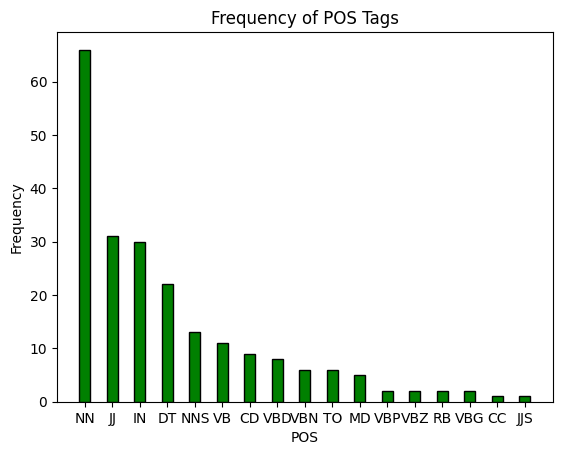

In [19]:
from matplotlib import pyplot as plt
pos_tags_df = pd.DataFrame(pos_tags, columns=["Word", "POS"])

# visualize frequency 
plt.bar(pos_tags_df["POS"].value_counts().keys(), pos_tags_df["POS"].value_counts().values, color="green", width=0.4, align="center", edgecolor="black")
plt.xlabel("POS")
plt.ylabel("Frequency")
plt.title("Frequency of POS Tags")
plt.show()

In [29]:
# Extract noun-verb pairs
noun_verb_pairs = []
for token in doc:
    subjects = [child for child in token.children]
    for subj in subjects:
        noun_verb_pairs.append((subj.text, token.text))

print("Noun-Verb Pairs:", noun_verb_pairs)


Noun-Verb Pairs: [('\n\n    ', 'marie'), ('marie', 'curie'), ('born', 'curie'), ('in', 'born'), ('in', 'born'), ('warsaw', 'in'), ('1867', 'in'), ('curie', 'discovered'), ('radium', 'discovered'), ('and', 'discovered'), ('won', 'discovered'), ('to', 'discovered'), ('prize', 'won'), ('in', 'won'), ('reflecting', 'won'), ('the', 'prize'), ('nobel', 'prize'), ('in', 'prize'), ('chemistry', 'in'), ('1911', 'in'), ('\n\n    ', '1911'), ('in', '1911'), ('parties', 'in'), ('the', 'hosts'), ('great', 'hosts'), ('gatsby', 'hosts'), ('jay', 'hosts'), ('gatsby', 'hosts'), ('hosts', 'parties'), ('lavish', 'parties'), ('in', 'parties'), ('york', 'in'), ('west', 'egg'), ('egg', 'york'), ('new', 'york'), ('excesses', 'reflecting'), ('deprivation', 'reflecting'), ('the', 'excesses'), ('of', 'excesses'), ('age', 'of'), ('the', 'age'), ('jazz', 'age'), ('\n\n    ', 'age'), ('study', 'age'), ('a', 'study'), ('recent', 'study'), ('in', 'study'), ('links', 'in'), ('nature', 'journal'), ('journal', 'links')

In [26]:
pos_tags_df.to_csv("pos_tags.csv", index=False)